In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import data and get into column format

In [2]:
df = pd.read_csv('./../data/original/ESP_PUBLIC.IDENTITE_ARBRE.csv')# , dtype={'GeoJSON', 'dict'})

In [3]:
df.head()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,31906,ESP32632,ESP32632,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7407272631197..."
1,31905,ESP32631,ESP32631,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7407481744995..."
2,31904,ESP32630,ESP32630,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7406973948781..."
3,31903,ESP32629,ESP32629,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7406754967071..."
4,31902,ESP32628,ESP32628,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7407015656395..."


In [4]:
df.GeoJSON #[0]

0        {"type":"Point","coordinates":[5.7407272631197...
1        {"type":"Point","coordinates":[5.7407481744995...
2        {"type":"Point","coordinates":[5.7406973948781...
3        {"type":"Point","coordinates":[5.7406754967071...
4        {"type":"Point","coordinates":[5.7407015656395...
                               ...                        
31809    {"type":"Point","coordinates":[5.7385133327466...
31810    {"type":"Point","coordinates":[5.7375284639688...
31811    {"type":"Point","coordinates":[5.7384331724843...
31812    {"type":"Point","coordinates":[5.7373296228308...
31813    {"type":"Point","coordinates":[5.7383287393841...
Name: GeoJSON, Length: 31814, dtype: object

In [5]:
df.GeoJSON[0]

'{"type":"Point","coordinates":[5.74072726311972,45.1905385120349]}'

In [6]:
type(df.GeoJSON[0])

str

In [7]:
df.GeoJSON[0]

'{"type":"Point","coordinates":[5.74072726311972,45.1905385120349]}'

https://appdividend.com/2020/11/20/how-to-convert-python-string-to-dictionary/

In [8]:
import json
x = json.loads('{"foo" : "bar", "hello" : "world"}')

In [9]:
df['GeoJSON'] = df.GeoJSON.apply(lambda x : json.loads(x))

In [10]:
df['GeoJSON'][0]

{'type': 'Point', 'coordinates': [5.74072726311972, 45.1905385120349]}

In [11]:
df['GeoJSON'][0]['coordinates']

[5.74072726311972, 45.1905385120349]

In [12]:
df['LONGITUDE'] = df['GeoJSON'].apply(lambda x : x['coordinates'][0])
df['LONGITUDE']

0        5.740727
1        5.740748
2        5.740697
3        5.740675
4        5.740702
           ...   
31809    5.738513
31810    5.737528
31811    5.738433
31812    5.737330
31813    5.738329
Name: LONGITUDE, Length: 31814, dtype: float64

In [13]:
df['LATITUDE'] = df['GeoJSON'].apply(lambda x : x['coordinates'][1])
df['LATITUDE']

0        45.190539
1        45.190525
2        45.190498
3        45.190491
4        45.190479
           ...    
31809    45.170517
31810    45.170382
31811    45.170630
31812    45.170571
31813    45.170538
Name: LATITUDE, Length: 31814, dtype: float64

In [31]:
df = df.drop(axis=1, labels='GeoJSON')

# investigate data 

In [32]:
df.head()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,REMARQUES,ANNEEDEPLANTATION,RAISONDEPLANTATION,TRAITEMENTCHENILLES,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,COLLECTIVITE,LONGITUDE,LATITUDE
0,31906,ESP32632,ESP32632,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740727,45.190539
1,31905,ESP32631,ESP32631,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740748,45.190525
2,31904,ESP32630,ESP32630,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740697,45.190498
3,31903,ESP32629,ESP32629,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740675,45.190491
4,31902,ESP32628,ESP32628,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740702,45.190479


In [33]:
df.shape

(31814, 27)

In [34]:
#### check to see how many missing values
df.isnull().sum()

ELEM_POINT_ID                0
CODE                         0
NOM                          0
GENRE                        0
GENRE_DESC                   0
CATEGORIE                    0
CATEGORIE_DESC               0
SOUS_CATEGORIE               0
SOUS_CATEGORIE_DESC          0
CODE_PARENT                  0
CODE_PARENT_DESC             0
ADR_SECTEUR                  0
BIEN_REFERENCE               0
GENRE_BOTA                1064
ESPECE                    3219
VARIETE                  27598
STADEDEDEVELOPPEMENT      2695
REMARQUES                30362
ANNEEDEPLANTATION         1392
RAISONDEPLANTATION       30035
TRAITEMENTCHENILLES      29524
IDENTIFIANTPLU           31208
TYPEIMPLANTATIONPLU      31208
INTITULEPROTECTIONPLU    31208
COLLECTIVITE              1253
LONGITUDE                    0
LATITUDE                     0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31814 entries, 0 to 31813
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ELEM_POINT_ID          31814 non-null  int64  
 1   CODE                   31814 non-null  object 
 2   NOM                    31814 non-null  object 
 3   GENRE                  31814 non-null  object 
 4   GENRE_DESC             31814 non-null  object 
 5   CATEGORIE              31814 non-null  object 
 6   CATEGORIE_DESC         31814 non-null  object 
 7   SOUS_CATEGORIE         31814 non-null  object 
 8   SOUS_CATEGORIE_DESC    31814 non-null  object 
 9   CODE_PARENT            31814 non-null  object 
 10  CODE_PARENT_DESC       31814 non-null  object 
 11  ADR_SECTEUR            31814 non-null  int64  
 12  BIEN_REFERENCE         31814 non-null  object 
 13  GENRE_BOTA             30750 non-null  object 
 14  ESPECE                 28595 non-null  object 
 15  VA

In [36]:
df.dtypes

ELEM_POINT_ID              int64
CODE                      object
NOM                       object
GENRE                     object
GENRE_DESC                object
CATEGORIE                 object
CATEGORIE_DESC            object
SOUS_CATEGORIE            object
SOUS_CATEGORIE_DESC       object
CODE_PARENT               object
CODE_PARENT_DESC          object
ADR_SECTEUR                int64
BIEN_REFERENCE            object
GENRE_BOTA                object
ESPECE                    object
VARIETE                   object
STADEDEDEVELOPPEMENT      object
REMARQUES                 object
ANNEEDEPLANTATION        float64
RAISONDEPLANTATION        object
TRAITEMENTCHENILLES       object
IDENTIFIANTPLU           float64
TYPEIMPLANTATIONPLU       object
INTITULEPROTECTIONPLU     object
COLLECTIVITE              object
LONGITUDE                float64
LATITUDE                 float64
dtype: object

In [37]:
df.describe()

,ELEM_POINT_ID,ADR_SECTEUR,ANNEEDEPLANTATION,IDENTIFIANTPLU,LONGITUDE,LATITUDE
count,31814.000000,31814.000000,30422.000000,606.000000,31814.000000,31814.000000
mean,18623.368643,3.856918,1988.331241,87.655116,5.727441,45.176939
std,11247.401647,1.700528,16.455846,60.392667,0.013004,0.011962
min,1.000000,1.000000,1950.000000,2.000000,5.697915,45.151572
25%,9044.250000,2.000000,1975.000000,67.000000,5.717492,45.166021
50%,18154.500000,4.000000,1985.000000,70.000000,5.729771,45.175540
75%,27315.750000,5.000000,2002.000000,70.000000,5.737508,45.186853
max,43041.000000,6.000000,2018.000000,358.000000,5.798704,45.224825


Check for unique values in columns

In [38]:
for label, column in df.items():
    print('-'*40)
    print(f'column name: {label}')
    print(f'number unique values: {column.nunique()}')
    print(f'unique values: {column.unique()}')


----------------------------------------
column name: ELEM_POINT_ID
number unique values: 31814
unique values: [31906 31905 31904 ... 14981 14939 22285]
----------------------------------------
column name: CODE
number unique values: 31814
unique values: ['ESP32632' 'ESP32631' 'ESP32630' ... 'ESP17096' 'ESP17074' 'ESP16645']
----------------------------------------
column name: NOM
number unique values: 31814
unique values: ['ESP32632' 'ESP32631' 'ESP32630' ... 'ESP17096' 'ESP17074' 'ESP16645']
----------------------------------------
column name: GENRE
number unique values: 1
unique values: ['VEG']
----------------------------------------
column name: GENRE_DESC
number unique values: 1
unique values: ['VEGETATION']
----------------------------------------
column name: CATEGORIE
number unique values: 1
unique values: ['ESP01']
----------------------------------------
column name: CATEGORIE_DESC
number unique values: 1
unique values: ['Arbre']
----------------------------------------
co

# remove useless columns

In [39]:
df.shape

(31814, 27)

#### Remove columns with all missing values

In [40]:
df.isnull().sum() == 31814

ELEM_POINT_ID            False
CODE                     False
NOM                      False
GENRE                    False
GENRE_DESC               False
CATEGORIE                False
CATEGORIE_DESC           False
SOUS_CATEGORIE           False
SOUS_CATEGORIE_DESC      False
CODE_PARENT              False
CODE_PARENT_DESC         False
ADR_SECTEUR              False
BIEN_REFERENCE           False
GENRE_BOTA               False
ESPECE                   False
VARIETE                  False
STADEDEDEVELOPPEMENT     False
REMARQUES                False
ANNEEDEPLANTATION        False
RAISONDEPLANTATION       False
TRAITEMENTCHENILLES      False
IDENTIFIANTPLU           False
TYPEIMPLANTATIONPLU      False
INTITULEPROTECTIONPLU    False
COLLECTIVITE             False
LONGITUDE                False
LATITUDE                 False
dtype: bool

In [41]:
empty_column_list = df.columns[df.isnull().sum() == 31814]
empty_column_list

Index([], dtype='object')

In [42]:
df.drop(axis=1, labels = empty_column_list)

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,REMARQUES,ANNEEDEPLANTATION,RAISONDEPLANTATION,TRAITEMENTCHENILLES,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,COLLECTIVITE,LONGITUDE,LATITUDE
0,31906,ESP32632,ESP32632,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740727,45.190539
1,31905,ESP32631,ESP32631,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740748,45.190525
2,31904,ESP32630,ESP32630,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740697,45.190498
3,31903,ESP32629,ESP32629,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740675,45.190491
4,31902,ESP32628,ESP32628,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740702,45.190479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31809,11290,ESP18364,ESP18364,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1171,...,NaN,1987.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.738513,45.170517
31810,11256,ESP18346,ESP18346,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1171,...,NaN,1987.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.737528,45.170382
31811,14981,ESP17096,ESP17096,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1171,...,NaN,1996.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.738433,45.170630
31812,14939,ESP17074,ESP17074,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1171,...,NaN,1987.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.737330,45.170571


Equally pandas has a method to do this...

In [43]:
df = df.dropna(axis=1,how='all')

In [44]:
df

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,REMARQUES,ANNEEDEPLANTATION,RAISONDEPLANTATION,TRAITEMENTCHENILLES,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,COLLECTIVITE,LONGITUDE,LATITUDE
0,31906,ESP32632,ESP32632,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740727,45.190539
1,31905,ESP32631,ESP32631,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740748,45.190525
2,31904,ESP32630,ESP32630,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740697,45.190498
3,31903,ESP32629,ESP32629,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740675,45.190491
4,31902,ESP32628,ESP32628,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740702,45.190479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31809,11290,ESP18364,ESP18364,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1171,...,NaN,1987.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.738513,45.170517
31810,11256,ESP18346,ESP18346,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1171,...,NaN,1987.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.737528,45.170382
31811,14981,ESP17096,ESP17096,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1171,...,NaN,1996.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.738433,45.170630
31812,14939,ESP17074,ESP17074,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1171,...,NaN,1987.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.737330,45.170571


##### drop all columns with only one value..

In [45]:
df.nunique()

ELEM_POINT_ID            31814
CODE                     31814
NOM                      31814
GENRE                        1
GENRE_DESC                   1
CATEGORIE                    1
CATEGORIE_DESC               1
SOUS_CATEGORIE               4
SOUS_CATEGORIE_DESC          4
CODE_PARENT               1458
CODE_PARENT_DESC          1458
ADR_SECTEUR                  6
BIEN_REFERENCE           31814
GENRE_BOTA                 112
ESPECE                     257
VARIETE                    183
STADEDEDEVELOPPEMENT         3
REMARQUES                    9
ANNEEDEPLANTATION           59
RAISONDEPLANTATION           3
TRAITEMENTCHENILLES          3
IDENTIFIANTPLU              46
TYPEIMPLANTATIONPLU          4
INTITULEPROTECTIONPLU        3
COLLECTIVITE                 2
LONGITUDE                31813
LATITUDE                 31813
dtype: int64

In [46]:
single_value_columns_list = df.columns[df.nunique() == 1]
df.drop(axis=1, labels = single_value_columns_list)

,ELEM_POINT_ID,CODE,NOM,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,BIEN_REFERENCE,GENRE_BOTA,...,REMARQUES,ANNEEDEPLANTATION,RAISONDEPLANTATION,TRAITEMENTCHENILLES,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,COLLECTIVITE,LONGITUDE,LATITUDE
0,31906,ESP32632,ESP32632,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,AR32632,Acer,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740727,45.190539
1,31905,ESP32631,ESP32631,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,AR32631,Acer,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740748,45.190525
2,31904,ESP32630,ESP32630,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,AR32630,Acer,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740697,45.190498
3,31903,ESP32629,ESP32629,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,AR32629,Acer,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740675,45.190491
4,31902,ESP32628,ESP32628,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,AR32628,Acer,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740702,45.190479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31809,11290,ESP18364,ESP18364,ESP174,Arbre d'espaces ouverts,ESP1171,Centre œcuménique St Marc,5,AR18364,Betula,...,NaN,1987.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.738513,45.170517
31810,11256,ESP18346,ESP18346,ESP174,Arbre d'espaces ouverts,ESP1171,Centre œcuménique St Marc,5,AR18346,Betula,...,NaN,1987.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.737528,45.170382
31811,14981,ESP17096,ESP17096,ESP174,Arbre d'espaces ouverts,ESP1171,Centre œcuménique St Marc,5,AR17096,Pyrus,...,NaN,1996.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.738433,45.170630
31812,14939,ESP17074,ESP17074,ESP174,Arbre d'espaces ouverts,ESP1171,Centre œcuménique St Marc,5,AR17074,Magnolia,...,NaN,1987.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.737330,45.170571


In [47]:
df = df.drop(axis=1, labels = single_value_columns_list)

In [48]:
df.shape

(31814, 23)

#### Some columns look like reference for database so decided to remove...

In [49]:
df.BIEN_REFERENCE

0        AR32632
1        AR32631
2        AR32630
3        AR32629
4        AR32628
          ...   
31809    AR18364
31810    AR18346
31811    AR17096
31812    AR17074
31813    AR16645
Name: BIEN_REFERENCE, Length: 31814, dtype: object

In [50]:
col_to_remove = ['NOM', 'BIEN_REFERENCE']

df = df.drop(col_to_remove, axis=1)

#### Remove missing dates in target variable for the moment

In [51]:
df = df[df.ANNEEDEPLANTATION.notnull()]
df.head()

,ELEM_POINT_ID,CODE,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,GENRE_BOTA,ESPECE,VARIETE,...,REMARQUES,ANNEEDEPLANTATION,RAISONDEPLANTATION,TRAITEMENTCHENILLES,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,COLLECTIVITE,LONGITUDE,LATITUDE
0,31906,ESP32632,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740727,45.190539
1,31905,ESP32631,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740748,45.190525
2,31904,ESP32630,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740697,45.190498
3,31903,ESP32629,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740675,45.190491
4,31902,ESP32628,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,...,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.740702,45.190479


In [53]:
df.shape

(30422, 21)

## where are missing values?

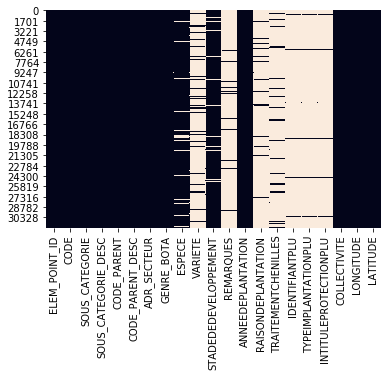

In [54]:
sns.heatmap(df.isnull(), cbar=False);

In [55]:
import missingno as msno

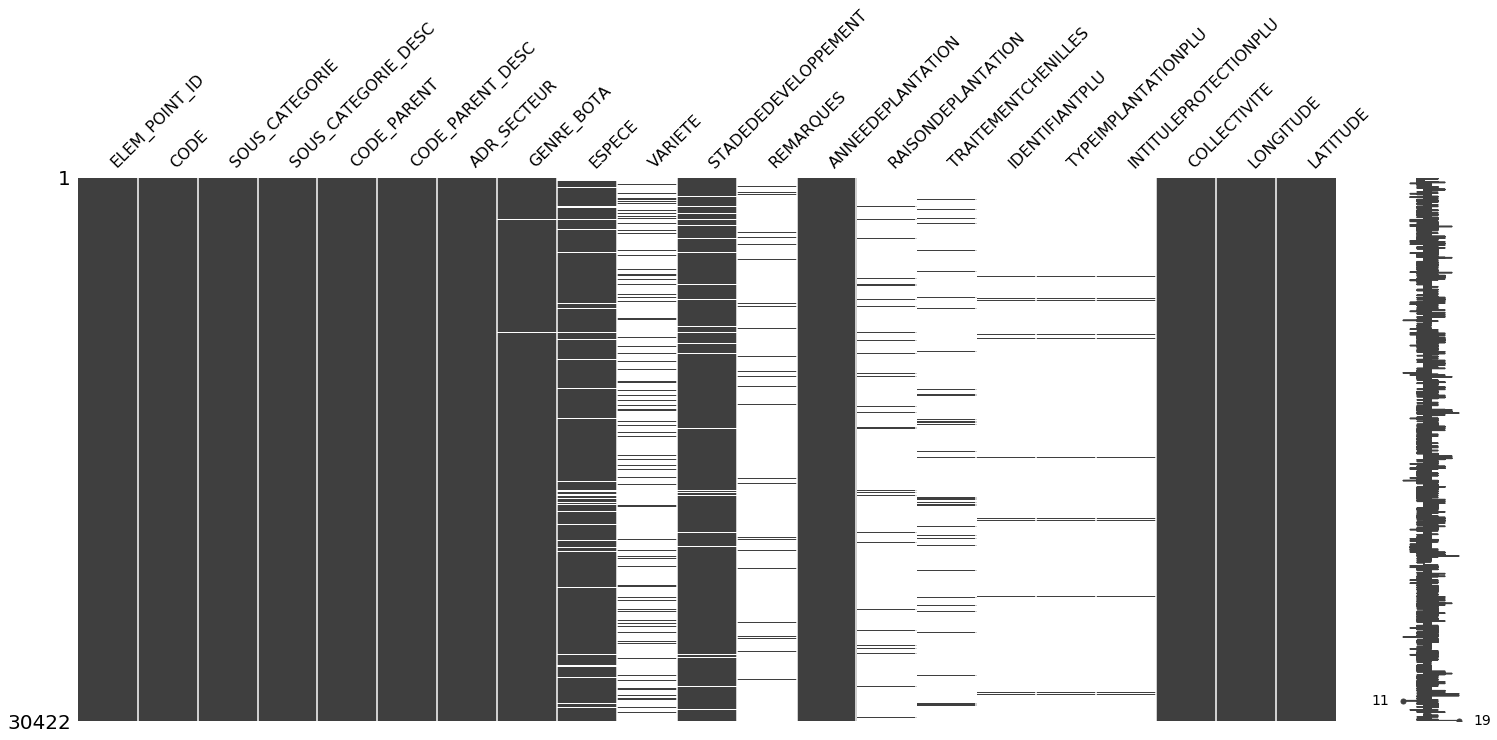

In [56]:
msno.matrix(df);

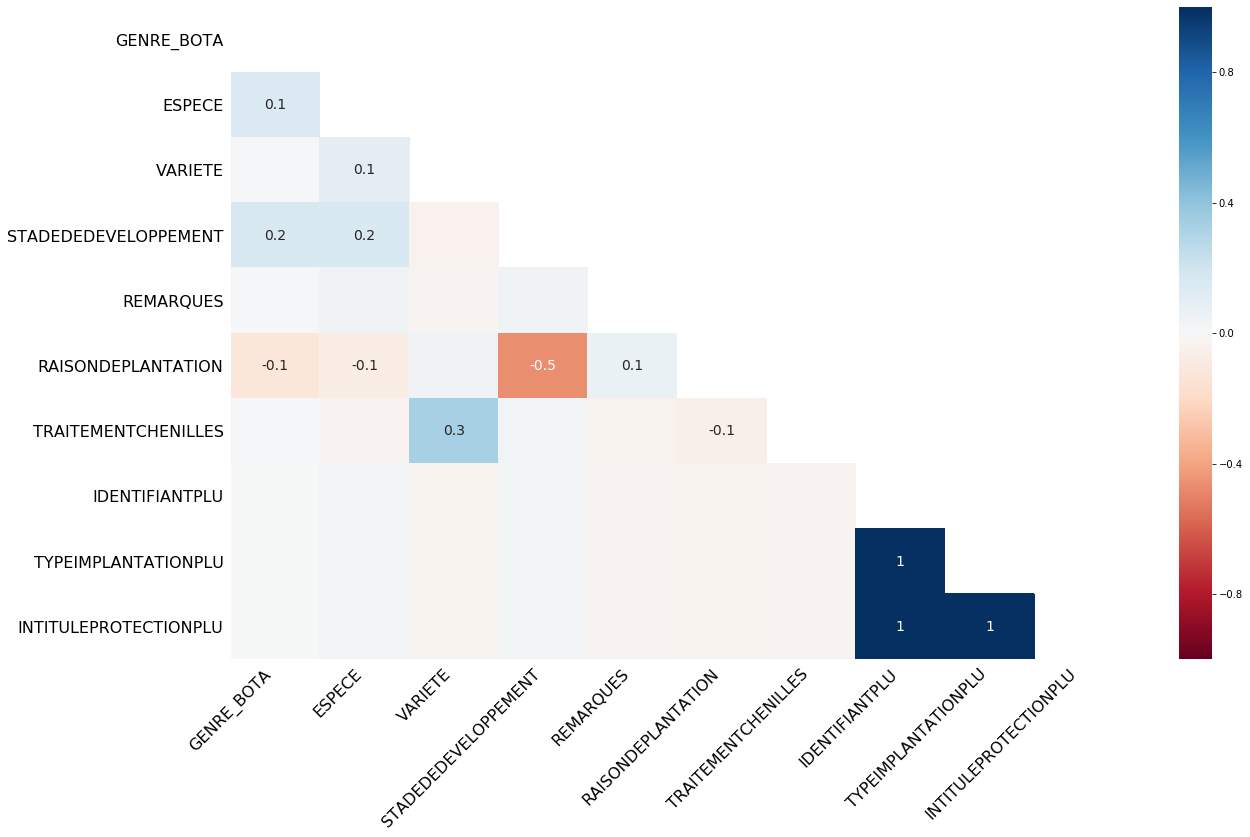

In [39]:
#### heatmap of null correlation! (not correlation of variables! we are not allowed to look at that yet)
msno.heatmap(df);

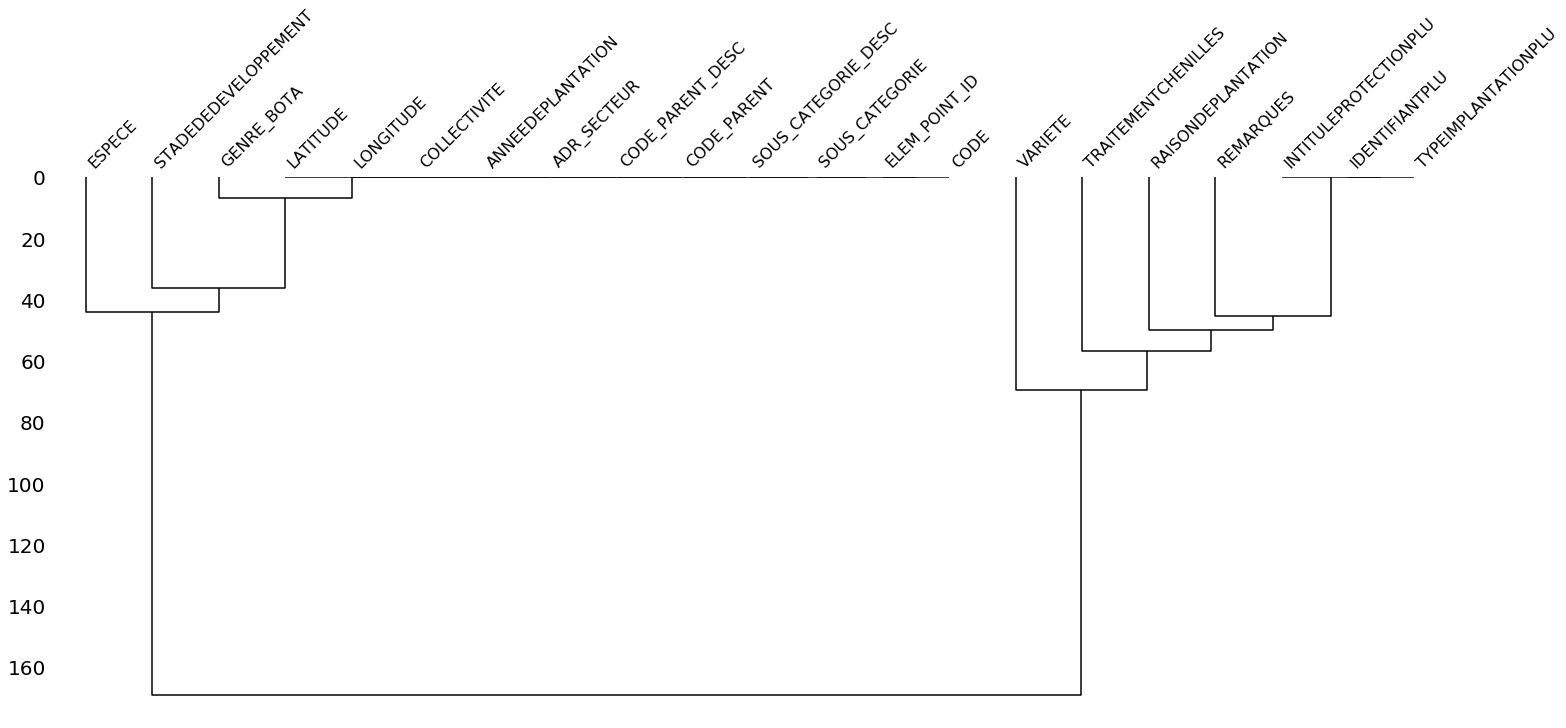

In [40]:
msno.dendrogram(df);

##### remove empty columns (+ close to empty) 

*NOTE this step is questionable! We are making a decision here which could have a big impact on the final result of our model!* We might throw away something very important here that we will not see again!

In [57]:

cols_list_clean = df.columns[df.isnull().sum() < 28000]
# 

In [58]:
cols_list_clean

Index(['ELEM_POINT_ID', 'CODE', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC',
       'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'GENRE_BOTA',
       'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'ANNEEDEPLANTATION',
       'COLLECTIVITE', 'LONGITUDE', 'LATITUDE'],
      dtype='object')

In [59]:
df = df[cols_list_clean]
df.head()

,ELEM_POINT_ID,CODE,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,COLLECTIVITE,LONGITUDE,LATITUDE
0,31906,ESP32632,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,2001.0,Ville de Grenoble,5.740727,45.190539
1,31905,ESP32631,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,2001.0,Ville de Grenoble,5.740748,45.190525
2,31904,ESP32630,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,2001.0,Ville de Grenoble,5.740697,45.190498
3,31903,ESP32629,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,2001.0,Ville de Grenoble,5.740675,45.190491
4,31902,ESP32628,ESP174,Arbre d'espaces ouverts,ESP995,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,2001.0,Ville de Grenoble,5.740702,45.190479


In [60]:
df.shape

(30422, 15)

NOTES

Features looking useful:
* sous_category looks useful (4 cats)
* ADR_SECTEUR (6 cats)
* STADEDEDEVELOPPEMENT (3 cats) 
* COLLECTIVITE (2 cats)


Less useful:
* CODE_PARENT_DESC (too many cats - ~1400, but could be usefull to make new featues (most common tree in local area etc).
* GENRE_BOTA (112 cats) 
* ESPECE(257 cats)
* VARIETE (183 cats but missing vals) 

df.to_csv('./data/modified/first_clean.csv',index=False)

## Save out to pickle file

In [61]:
df.to_pickle('./../data/modified/trees_first_clean.pkl')